In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!ls '/content/drive/My Drive/SSVEP_CU_workshop/'

3DCNN_weights		     keras.json
All_picture		     simple_model_weights
Answer_workshop		     weights
Datasets		     Workshop_LAB1_Frequency_Recognition.ipynb
Introduction_EEG_BCI_slides  Workshop_LAB2_DeepLearning_answer.ipynb


In [3]:
!cat ~/.keras/keras.json

{
    "floatx": "float32",
    "epsilon": 1e-07,
    "backend": "tensorflow",
    "image_data_format": "channels_first"
}


In [0]:
!cp /content/drive/My\ Drive/SSVEP_CU_workshop/keras.json /content

In [0]:
!cp ./keras.json ~/.keras/keras.json

In [6]:
!cat ~/.keras/keras.json

{
    "floatx": "float32",
    "epsilon": 1e-07,
    "backend": "tensorflow",
    "image_data_format": "channels_first"
}


## 1. Set ของ Libraries ที่จำเป็น




In [0]:
# import necessary libralies
import numpy as np
import pandas as pd
import scipy.io
from scipy.io import loadmat
import matplotlib.pyplot as plt

## 2. การนำเข้าข้อมูล (Steady State Evoked Visually Potential) SSVEP โดยใช้ Scipy library

In [0]:
# Set Path
folder_path = '/content/drive/My Drive/SSVEP_CU_workshop/'

In [0]:
# import SSVEP datasets
subject = 20
mat_sess1 = scipy.io.loadmat(folder_path+"Datasets/sess01_subj"+str(subject).zfill(2)+"_EEG_SSVEP.mat") # ข้อมูลวันที่ 1 
mat_sess2 = scipy.io.loadmat(folder_path+"Datasets/sess02_subj"+str(subject).zfill(2)+"_EEG_SSVEP.mat") # ข้อมูลวันที่ 2 

## 3. การเข้าถึงข้อมูล SSVEP ที่สนใจ

### ภาพรวมของข้อมูล SSVEP dataset
- ผู้เข้าร่วมทดลองจะถูกกำหนด target stimus (stimulus เปลี่ยนเป็นสีเหลือง) ใช้เวลา 4 วินาที/trial
- ผู้เข้าร่วมทดลองต้องทำการโฟกัส target stimulus เป็นเวลา 4/trial วินาที (target stimulus จะกระพริบด้วยความถี่ที่จำเพาะด้วยสีขาวสลับดำ)
- แต่ละ target stimulus จะถูกผู้เข้าร่วมโฟกัสซ้ำจำนวน 25 ครั้ง
- ดังนั้นแต่ละคนจะมีจำนวน sample (4 ความถี่ $\times$ 25 ครั้ง = 100 samples) 


- มากกว่าไปกว่านี้ ข้อมูล SSVEP ของแต่ละคน จะทั้ง offline phase (training data, 100 samples) and online phase (testing data, 100 samples)
- สุดท้ายนี้ผู้เข้าร่วมทดลองจะถูกเก็บข้อมูล SSVEP 2 วัน 

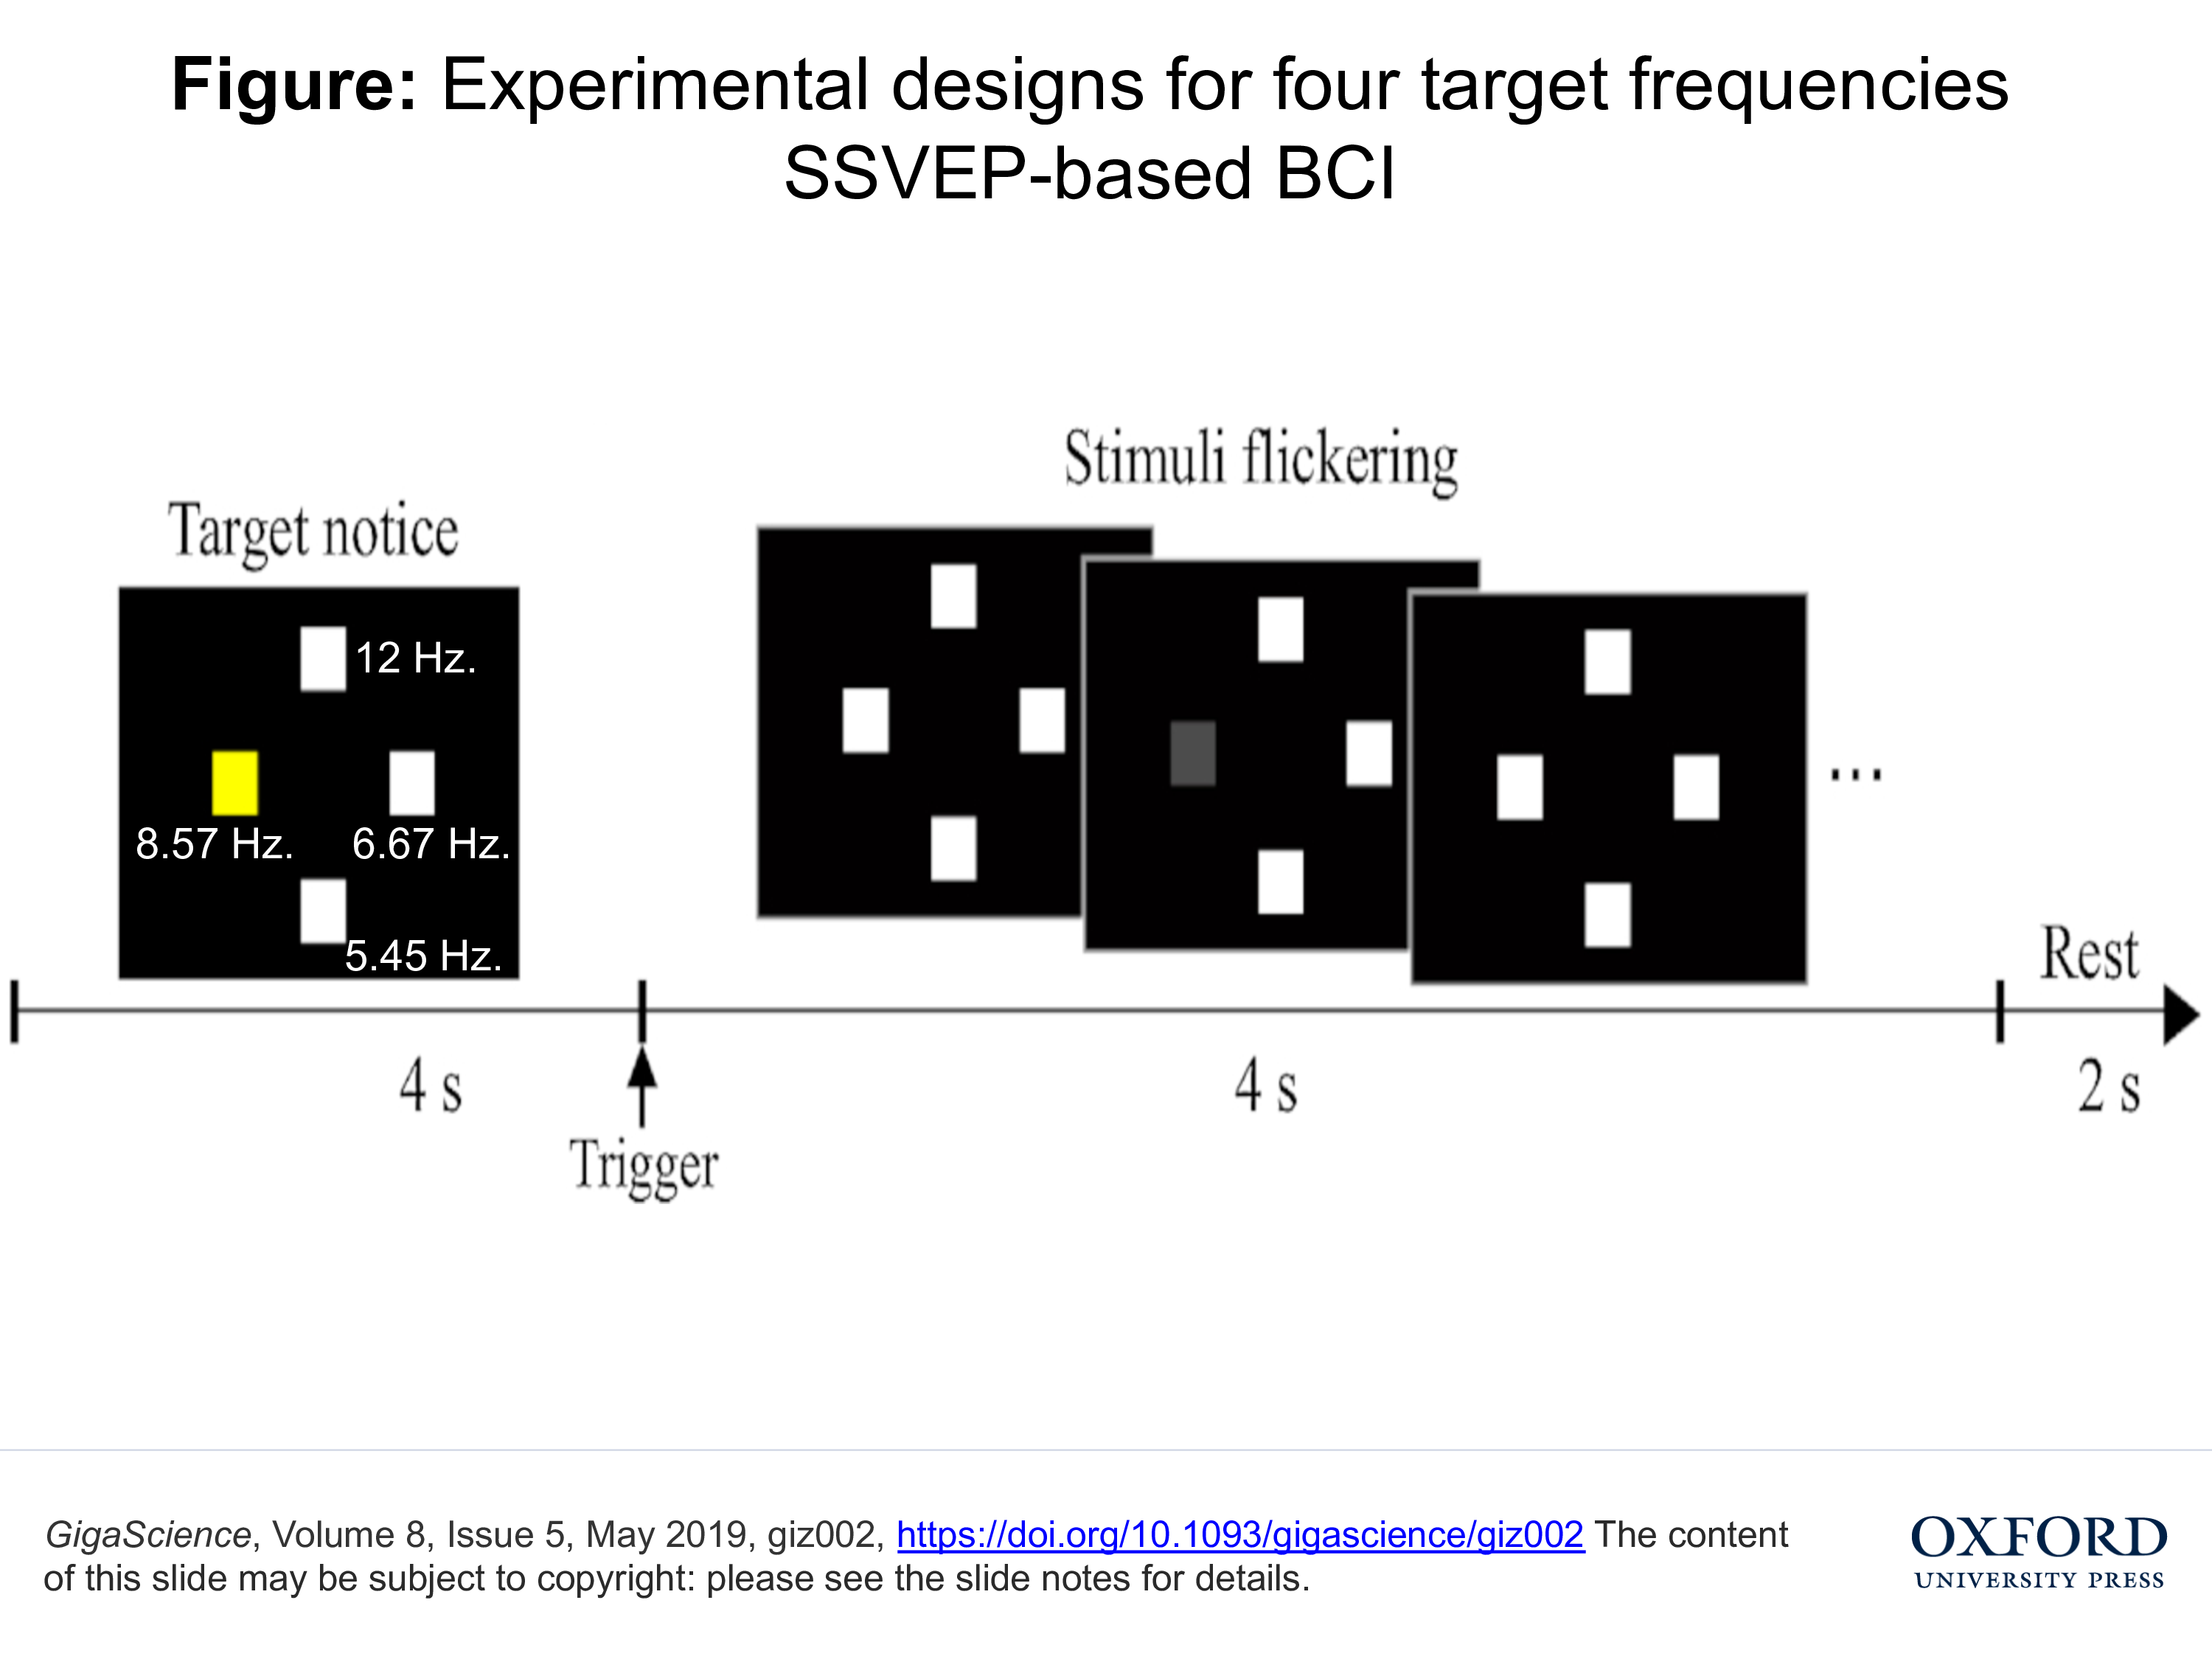

In [10]:
from IPython.display import Image
Image(folder_path+'All_picture/Four_targets_SSVEP.png', width=700)

### ตำแหน่ง electrode ที่ใช้ record สัญญาณ SSVEP

In [11]:
Image(folder_path+'All_picture/EEG_electrodes.png', width=700)

Output hidden; open in https://colab.research.google.com to view.

In [12]:
# Check ตำแหน่ง electrode จากข้อมูล SSVEP 
num_ch = np.array([ch for [ch] in mat_sess1['EEG_SSVEP_train'][0]['chan'][0][0]])
print(num_ch)
print("Note that: ตำแหน่ง electrode มีเหมือนกัน ทั้ง traing data และ testing data")

['Fp1' 'Fp2' 'F7' 'F3' 'Fz' 'F4' 'F8' 'FC5' 'FC1' 'FC2' 'FC6' 'T7' 'C3'
 'Cz' 'C4' 'T8' 'TP9' 'CP5' 'CP1' 'CP2' 'CP6' 'TP10' 'P7' 'P3' 'Pz' 'P4'
 'P8' 'PO9' 'O1' 'Oz' 'O2' 'PO10' 'FC3' 'FC4' 'C5' 'C1' 'C2' 'C6' 'CP3'
 'CPz' 'CP4' 'P1' 'P2' 'POz' 'FT9' 'FTT9h' 'TTP7h' 'TP7' 'TPP9h' 'FT10'
 'FTT10h' 'TPP8h' 'TP8' 'TPP10h' 'F9' 'F10' 'AF7' 'AF3' 'AF4' 'AF8' 'PO3'
 'PO4']
Note that: ตำแหน่ง electrode มีเหมือนกัน ทั้ง traing data และ testing data


### ตำแหน่ง electrode ที่เลือกใช้เพื่อทำการวิเคราะห์สัญญาณ SSVEP

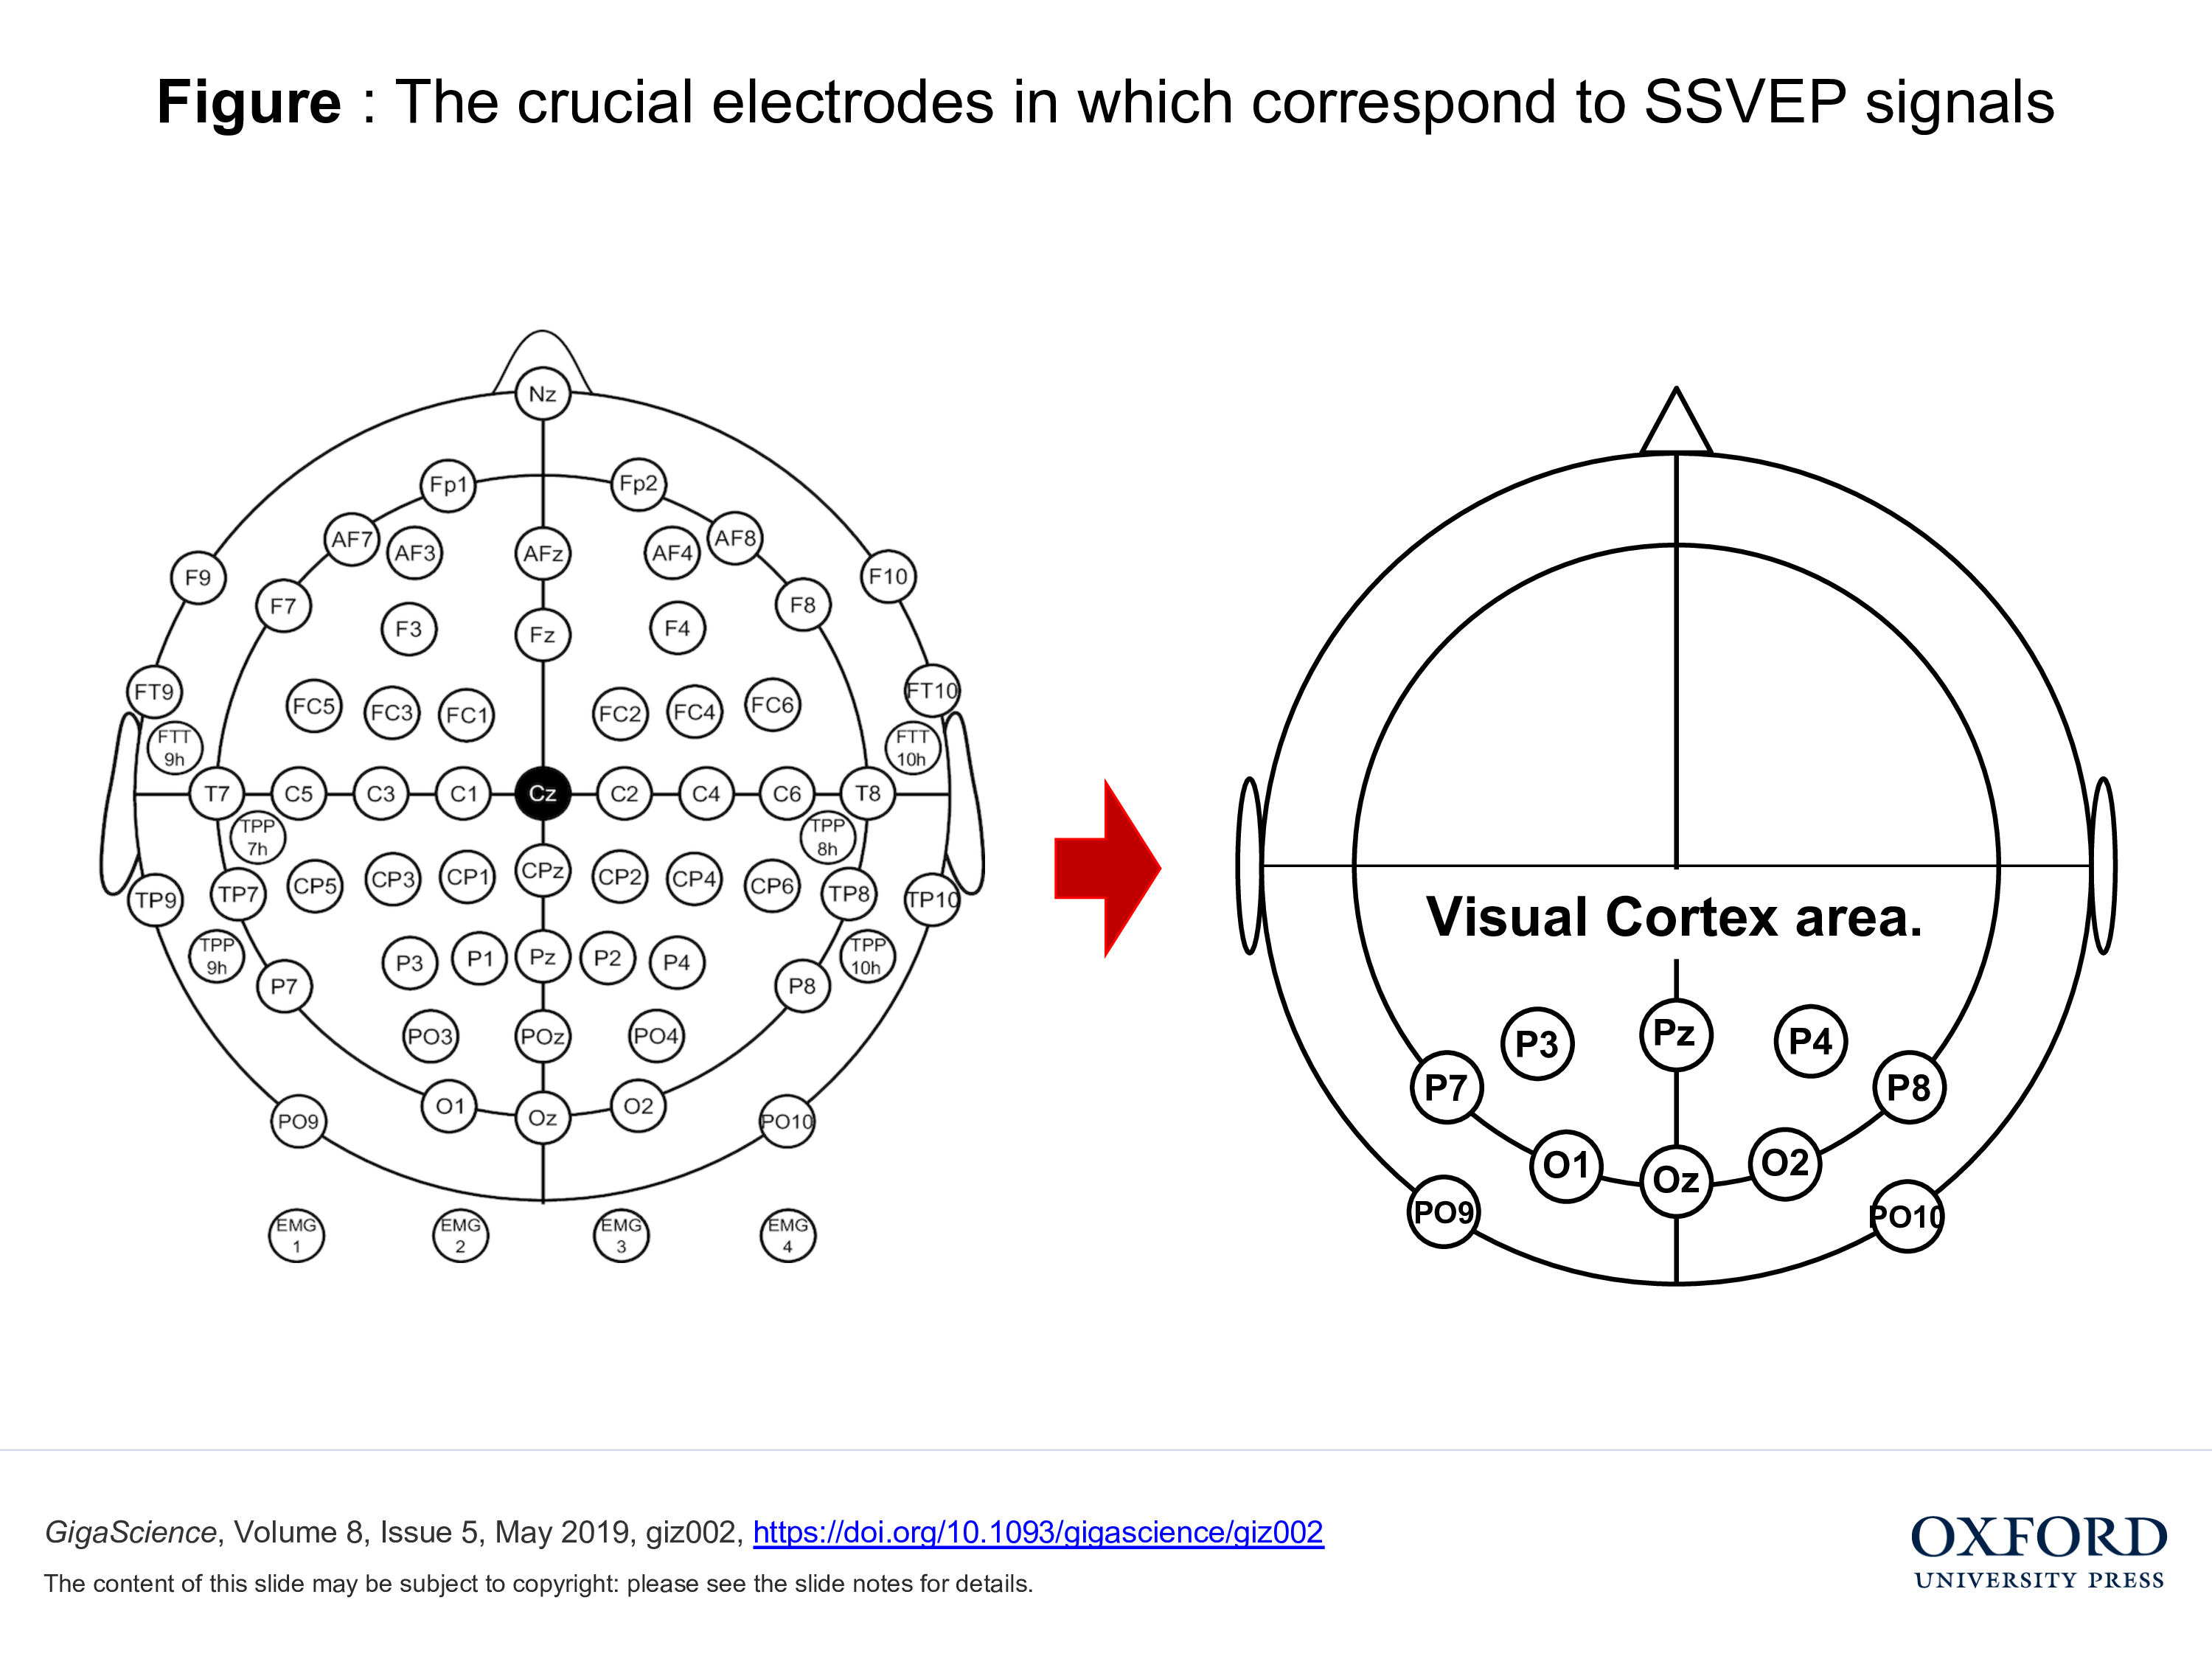

In [13]:
Image(folder_path+'All_picture/Visual_cortex.png', width=700)

In [14]:
# ตรวจสอบ index ของ electrode จากข้อมูล SSVEP 
ssvep_ch = np.array(['P7', 'P3', 'Pz', 'P4', 'P8', 'PO9', 'PO10', 'O1', 'Oz', 'O2' ])
idx_ssvep_ch = []

for se_ch in ssvep_ch:
    index_ch = np.where(num_ch == se_ch)[0][0]
    idx_ssvep_ch.append(index_ch)
    print("SSVEP_channel_name:", se_ch ,"---", "Index_is:", index_ch)
print("Done")

SSVEP_channel_name: P7 --- Index_is: 22
SSVEP_channel_name: P3 --- Index_is: 23
SSVEP_channel_name: Pz --- Index_is: 24
SSVEP_channel_name: P4 --- Index_is: 25
SSVEP_channel_name: P8 --- Index_is: 26
SSVEP_channel_name: PO9 --- Index_is: 27
SSVEP_channel_name: PO10 --- Index_is: 31
SSVEP_channel_name: O1 --- Index_is: 28
SSVEP_channel_name: Oz --- Index_is: 29
SSVEP_channel_name: O2 --- Index_is: 30
Done


### 4. การ Pre-processing สัญญาณ SSVEP

### ตรวจสอบ sampling rate หรือ sampling frequency ของข้อมูล SSVEP

In [15]:
smp_freq = mat_sess1['EEG_SSVEP_train'][0]['fs'][0][0][0]
print("Sampling frequency of this SSVEP dataset is:", smp_freq, "Hz.")

Sampling frequency of this SSVEP dataset is: 1000 Hz.


### การเตรียม training data และ testing data

In [16]:
# เตรียมข้อมูล SSVEP (training set และ testing set) โดยพิจารณาเฉพาะ ตำแหน่ง electrode ที่สนใจ 
# และจัด dimesion ของข้อมูลให้อยู่ในรูปแบบ (samples, channels, time_points)

# Training data preparation session 1
tr_sess1 = mat_sess1['EEG_SSVEP_train'][0]['smt'][0] 
print("Dimension_of_raw_training_data", tr_sess1.shape)

tr_sess1 = (np.swapaxes(tr_sess1, 0, 2))[idx_ssvep_ch]# ทำการสลับ dimension ของ training data และเลือก SSVEP electrodes
tr_sess1 = np.swapaxes(tr_sess1, 0, 1) # ทำการสลับ dimension ของ training data ครั้งสุดท้าย
print("Dimension_of_training_session1:", tr_sess1.shape)

# Training data preparation session 2
tr_sess2 = mat_sess2['EEG_SSVEP_train'][0]['smt'][0] 
print("Dimension_of_raw_training_data", tr_sess2.shape)

tr_sess2 = (np.swapaxes(tr_sess2, 0, 2))[idx_ssvep_ch]# ทำการสลับ dimension ของ training data และเลือก SSVEP electrodes
tr_sess2 = np.swapaxes(tr_sess2, 0, 1) # ทำการสลับ dimension ของ training data ครั้งสุดท้าย
print("Dimension_of_training_session2:", tr_sess2.shape)

Dimension_of_raw_training_data (4000, 100, 62)
Dimension_of_training_session1: (100, 10, 4000)
Dimension_of_raw_training_data (4000, 100, 62)
Dimension_of_training_session2: (100, 10, 4000)


In [17]:
# Training data preparation session 1
te_sess1 = mat_sess1['EEG_SSVEP_test'][0]['smt'][0] 
print("Dimension_of_raw_testing_data", te_sess1.shape)

te_sess1 = (np.swapaxes(te_sess1, 0, 2))[idx_ssvep_ch]# ทำการสลับ dimension ของ testing data และเลือก SSVEP electrodes
te_sess1 = np.swapaxes(te_sess1, 0, 1) # ทำการสลับ dimension ของ testing data ครั้งสุดท้าย
print("Dimension_of_testing_session1:", te_sess1.shape)

# Training data preparation session 2
te_sess2 = mat_sess2['EEG_SSVEP_test'][0]['smt'][0] 
print("Dimension_of_raw_testing_data", te_sess2.shape)

te_sess2 = (np.swapaxes(te_sess2, 0, 2))[idx_ssvep_ch]# ทำการสลับ dimension ของ testing data และเลือก SSVEP electrodes
te_sess2 = np.swapaxes(te_sess2, 0, 1) # ทำการสลับ dimension ของ testing data ครั้งสุดท้าย
print("Dimension_of_testing_session2:", te_sess2.shape)

Dimension_of_raw_testing_data (4000, 100, 62)
Dimension_of_testing_session1: (100, 10, 4000)
Dimension_of_raw_testing_data (4000, 100, 62)
Dimension_of_testing_session2: (100, 10, 4000)


### การเตรียม label สำหรับ training data และ testing data

In [18]:
name_class = mat_sess1['EEG_SSVEP_train'][0]['class'][0]
print("Defination of class name is...")
print(name_class)

Defination of class name is...
[[array(['1'], dtype='<U1') array(['up'], dtype='<U2')]
 [array(['2'], dtype='<U1') array(['left'], dtype='<U4')]
 [array(['3'], dtype='<U1') array(['right'], dtype='<U5')]
 [array(['4'], dtype='<U1') array(['down'], dtype='<U4')]]


In [19]:
# ตัวอย่างเซตของคำตอบ (label)
print(mat_sess1['EEG_SSVEP_train'][0]['y_dec'][0][0])

[3 2 3 4 3 4 3 3 2 1 3 3 3 1 1 4 2 1 2 3 2 4 2 4 1 1 3 2 2 2 1 1 4 3 4 3 4
 4 3 3 2 2 1 2 1 4 3 1 3 1 3 1 2 1 4 3 3 4 1 1 2 4 1 2 4 1 3 3 3 2 4 2 4 4
 1 3 2 2 1 4 4 2 2 1 4 3 4 4 2 2 4 2 1 1 4 2 1 1 4 3]


In [20]:
# Label preparation
#Traing set
label_tr_sess1 = mat_sess1['EEG_SSVEP_train'][0]['y_dec'][0][0]
label_tr_sess2 = mat_sess2['EEG_SSVEP_train'][0]['y_dec'][0][0]
#Testing set
label_te_sess1 = mat_sess1['EEG_SSVEP_test'][0]['y_dec'][0][0]
label_te_sess2 = mat_sess2['EEG_SSVEP_test'][0]['y_dec'][0][0]
print("Example of labeling for training an dtesting")
print("Training_label_sess1", label_tr_sess1)
print("Testing_label_sess1", label_te_sess1)

Example of labeling for training an dtesting
Training_label_sess1 [3 2 3 4 3 4 3 3 2 1 3 3 3 1 1 4 2 1 2 3 2 4 2 4 1 1 3 2 2 2 1 1 4 3 4 3 4
 4 3 3 2 2 1 2 1 4 3 1 3 1 3 1 2 1 4 3 3 4 1 1 2 4 1 2 4 1 3 3 3 2 4 2 4 4
 1 3 2 2 1 4 4 2 2 1 4 3 4 4 2 2 4 2 1 1 4 2 1 1 4 3]
Testing_label_sess1 [3 4 4 2 2 4 3 3 2 3 3 4 4 4 1 3 2 2 1 1 4 2 2 4 2 2 3 1 3 2 2 4 2 4 1 1 2
 4 1 1 3 2 4 2 2 4 3 1 4 3 4 2 1 3 3 3 1 4 1 1 1 1 4 1 4 3 1 3 1 4 2 3 2 3
 2 3 4 3 1 1 4 2 3 3 1 2 4 2 1 3 4 3 3 1 1 2 4 1 2 4]


In [21]:
# รวมข้อมูลสัญญาณ SSVEP ทั้ง 2 วันเข้าด้วยกัน
X_train = np.concatenate((tr_sess1, tr_sess2), axis=0)
y_train = np.concatenate((label_tr_sess1, label_tr_sess2), axis=0)

X_test = np.concatenate((te_sess1, te_sess2), axis=0)
y_test = np.concatenate((label_te_sess1, label_te_sess2), axis=0)

print("Checking dimension of both training and testing sets")
print("Training shape:", X_train.shape)
print("Testing shape:", X_test.shape)

Checking dimension of both training and testing sets
Training shape: (200, 10, 4000)
Testing shape: (200, 10, 4000)


### การ down-sampled สัญญาณ SSVEP จาก 1000 Hz เป็น 250 Hz.
- เนื่องจากความยาวของสัญญาณ SSVEP มีความยาว 4 วินาทีต่อsample ดังนั้นก่อนทำการ down-sampled สัญญาณ SSVEP จะมีความถี่ 1,000 Hz. (รวม 4 วินาที จะมี 4,000 จุดต่อกราฟ time series) และหลังจากทำการ down-sampled สัญญาณ SSVEP ควรจะมี 1,000 จุดต่อกราฟ time series เพื่อให้มีความถี่ของกราฟ time series เท่ากับ 250 Hz.  

In [0]:
# the necessary library
from scipy import signal

In [0]:
# Down-sampled function
def resampling(data, new_smp_point):
    if len(data.shape) == 3:
        data_resampled = np.zeros((data.shape[0], data.shape[1], new_smp_point))
        for i in range(data.shape[0]):
            for j in range(data.shape[1]):
                data_resampled[i,j,:] = signal.resample(data[i,j,:], new_smp_point)
        print("Down sampling is finished with dimension of: ", data_resampled.shape)
        return data_resampled
    else:
        print("---Error dimension---")

In [24]:
# ทำการ down-sampled บน tranning set และ testing set
new_sample_point = 1000
new_smp_freq = 250
X_train_ds = resampling(X_train, new_sample_point) 
X_test_ds = resampling(X_test, new_sample_point) 

print("Validate the dimension in both of training and testing sets")
print("New shape of training set:", X_train_ds.shape)
print("New shape of testing set:", X_test_ds.shape)

Down sampling is finished with dimension of:  (200, 10, 1000)
Down sampling is finished with dimension of:  (200, 10, 1000)
Validate the dimension in both of training and testing sets
New shape of training set: (200, 10, 1000)
New shape of testing set: (200, 10, 1000)


### การคัดกรองความถี่ที่สนใจของสัญญาณ SSVEP 
- เนื่องจากสัญญาณ SSVEP ที่ได้รับจากเครื่องวัดสัญญาณสมองโดยตรงมีความถี่ของสัญญาณที่ไม่ได้สนใจปนอยู่ด้วย (Noise) โดยเฉพาะที่ 50 Hz. เป็นความถี่ของไฟบ้านทั่วไป หากไม่ทำการกรองออกสัญญาณที่ความถี่นี้จะบดบังความถี่องสัญญาณ SSVEP
- ใน workshop ครั้งนี้เราจึงจะใช้เทคคนิค Band-pass filter มากรองเอาเฉพาะช่วงความถี่ที่สนใจ โดยจะกำหนด low_cut = 0.5 Hz. , high_cut = 40 Hz. and order = 2.

In [0]:
# Necessary library
from scipy.signal import butter, filtfilt

In [0]:
# Band-pass filter is one of pre-processing technique.
def butter_bandpass_filter(data, lowcut, highcut, fs, order):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    y = filtfilt(b, a, data)
    return y

In [27]:
# ทำการัดกรองความถี่บนสัญญาณ SSVEP ให้ความถี่อยู่ในช่วง 4.5-40 Hz. 
X_train_bf = butter_bandpass_filter(X_train_ds, 4.5, 40, new_smp_freq, 2) 
X_test_bf = butter_bandpass_filter(X_test_ds, 4.5, 40, new_smp_freq, 2) 
print("Check the dimension in both of training and testing sets")
print("Shape of training set:", X_train_bf.shape)
print("Shape of testing set:", X_test_bf.shape)

Check the dimension in both of training and testing sets
Shape of training set: (200, 10, 1000)
Shape of testing set: (200, 10, 1000)


### ทำการแบ่ง testing data เป็น validation set ครึ่งหนึ่ง และอีกครึ่งยังคงเป็น testing set เหมือนเดิม และสัญญาณ SSVEP แต่ละคลาสจะต้องมีจำนวนเท่ากันด้วย (Class Balance)

In [29]:
from sklearn.model_selection import train_test_split
X_val_split, X_test_split, y_val_split, y_test_split = train_test_split(X_test_bf, y_test, test_size=0.5, random_state=42, stratify = y_test)
print("Dimension of validation data is: ", X_val_split.shape)
print("Dimension of validation label is: ", y_val_split.shape)
print("\n")
print("Dimension of testing data is: ", X_test_split.shape)
print("Dimension of testing label is: ", y_test_split.shape)

Dimension of validation data is:  (100, 10, 1000)
Dimension of validation label is:  (100,)


Dimension of testing data is:  (100, 10, 1000)
Dimension of testing label is:  (100,)


In [0]:
# สร้างฟังก์ชันเพื่อทำการสไลด์สัญญาณ SSVEP ให้มีความยาว 1 วินาทีต่อ sample

def sliding_window(data, win_sec_len, smp_freq):
    len_data = data.shape[2]
    step = 0.5 # It means 50 percentages of overlap 
    win_len = int(win_sec_len*smp_freq)
    num_win = int(((len_data - win_len)/(win_len * step))+1) # A number of sliding window
    data_slid = np.zeros((data.shape[0], num_win, data.shape[1], win_len))

    for sample in range(data.shape[0]):             # number of samples
        for channel in range(data.shape[1]):        # number of channels
            for idx_win in range(num_win):          # number of slices
            
                start_pos = int(idx_win * win_len * step)
                stop_pos  = int(start_pos + win_len)
                data_slid[sample, idx_win, channel, :] = data[sample, channel, start_pos:stop_pos]
    return data_slid, num_win

In [31]:
# ทำการสไลด์สัญญาณ SSVEP จากความยาว 4 วินาที (1,000 time points) เป็นความยาว 1 วินาที (250 time points)
X_train_slid, num_win = sliding_window(X_train_bf, 1, new_smp_freq)
X_val_slid, _ = sliding_window(X_val_split, 1, new_smp_freq)
X_test_slid, _ = sliding_window(X_test_split, 1, new_smp_freq)
print("Dimension of training set is: ", X_train_slid.shape)
print("Dimension of validation set is: ", X_val_slid.shape)
print("Dimension of testing set is: ", X_test_slid.shape)
print("A number of sliding window is: ", num_win)

Dimension of training set is:  (200, 7, 10, 250)
Dimension of validation set is:  (100, 7, 10, 250)
Dimension of testing set is:  (100, 7, 10, 250)
A number of sliding window is:  7


In [32]:
# ทำการเพิ่มจำนวน labeling 
y_train_slid = np.repeat(y_train[:, np.newaxis], num_win, axis=1)-1
y_val_slid = np.repeat(y_val_split[:, np.newaxis], num_win, axis=1)-1
y_test_slid = np.repeat(y_test_split[:, np.newaxis], num_win, axis=1)-1
print("Our new labeling for training is: \n", y_train_slid)
print("\n")
print("The dimension of our new labeling for validation is: ", y_val_slid.shape)
print("The dimension of our new labeling for testing is: ", y_test_slid.shape)

Our new labeling for training is: 
 [[2 2 2 ... 2 2 2]
 [1 1 1 ... 1 1 1]
 [2 2 2 ... 2 2 2]
 ...
 [0 0 0 ... 0 0 0]
 [1 1 1 ... 1 1 1]
 [3 3 3 ... 3 3 3]]


The dimension of our new labeling for validation is:  (100, 7)
The dimension of our new labeling for testing is:  (100, 7)


### การใช้โมเดล (Long short-term memory: LSTM)  อย่างง่ายในการแยกความถี่สัญญาณ SSVEP 

In [0]:
# Reshape for classifier models
X_train_sim = X_train_slid.reshape(-1, X_train_slid.shape[2], X_train_slid.shape[3])
X_val_sim = X_val_slid.reshape(-1, X_val_slid.shape[2], X_val_slid.shape[3])
X_test_sim = X_test_slid.reshape(-1, X_test_slid.shape[2], X_test_slid.shape[3])

y_train_sim = y_train_slid.reshape(-1)
y_val_sim = y_val_slid.reshape(-1)
y_test_sim = y_test_slid.reshape(-1)

In [34]:
import keras
from keras.models import Sequential, load_model
from keras.layers import Activation, Dense, Dropout, Reshape, Flatten, GRU, LSTM 
from keras.callbacks import CSVLogger, ModelCheckpoint, ReduceLROnPlateau, TensorBoard

Using TensorFlow backend.


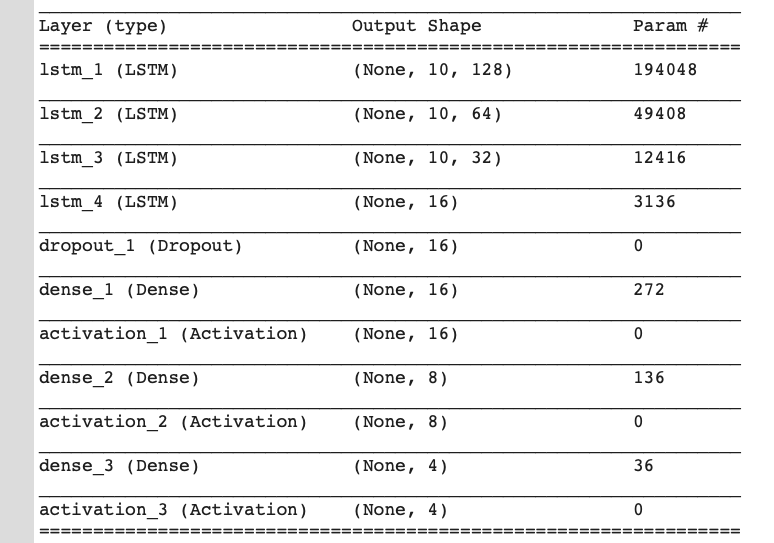

In [35]:
from IPython.display import Image
Image(folder_path+'All_picture/question_model.png', width=700)

In [0]:
# TODO#1: ให้ทำการสร้างโครงสร้าง DL model ตามภาพข้างบน
#################################################################################
def LSTM_model(input_dim):
    # Select between GRU or LSTM
    # Change size of layer follow experiment design
    model = Sequential()
    model.add(LSTM(128, recurrent_dropout=do_rate, return_sequences=True, input_shape=(input_dim)))
    model.add(LSTM(64, recurrent_dropout=do_rate, return_sequences=True))
    model.add(LSTM(32, recurrent_dropout=do_rate, return_sequences=False))
    model.add(Dense(32))
    model.add(Activation('relu'))
    model.add(Dropout(do_rate))
    model.add(Dense(16))
    model.add(Activation('relu'))
    model.add(Dropout(do_rate))
    model.add(Dense(num_classes))
    model.add(Activation('softmax'))

#################################################################################
#                               END OF TODO#1                                   #
#################################################################################

    print(model.summary()) # Show summary of model
    
    return model

In [0]:
def training_simple(X_train,y_train,X_val,y_val, save_path):
    model = LSTM_model((10,250))
    print("Training...")
    adam = keras.optimizers.adam(lr=0.01, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
    model.compile(optimizer = adam, loss = "sparse_categorical_crossentropy", metrics=['sparse_categorical_accuracy'])
    reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=0.001)
    csv_logger = CSVLogger(save_path+"SSVEP_"+str(subject)+".log")
    filepath=save_path+"SSVEP"+str(subject)+"_weights-v-{epoch:02d}.hdf5"
    checkpointer = ModelCheckpoint(monitor='val_loss', filepath=filepath, verbose=1, save_best_only=True)
    model.fit(X_train, y_train, batch_size=128, epochs=50, validation_data=(X_val,y_val), verbose=1, callbacks=[checkpointer,csv_logger, reduce_lr])

    # open log file
    # log file contains loss of each epoch in each running step
    log_file = save_path+"SSVEP_"+str(subject)+".log"
    loss = []
    with open(log_file) as f:
        f = f.readlines()
    f[0:] = f[1:] #delete header
    for line in f:
        loss.append([int(line.split(',')[0]), float(line.split(',')[3])]) #save all lost to list

    # find minimum loss
    # Keep minimum lost and save its index and use it for testing  
    min_loss = 100
    for data in range(len(loss)):
        if loss[data][1] < min_loss:
            min_loss = loss[data][1]
            best_model_index = loss[data][0]
    return best_model_index,loss[:][1]

In [0]:
def testing_simple(X_te, Y_te, w_path):
    model = load_model(w_path)
    adam = keras.optimizers.adam(lr=0.01, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
    model.compile(loss='sparse_categorical_crossentropy', optimizer = adam, metrics=['sparse_categorical_accuracy'])
    loss, accuracy = model.evaluate(X_te, Y_te, batch_size=64, verbose=1)
    print('Test loss:', loss)
    print('Test accuracy:', accuracy)  
    return loss, accuracy, model

In [44]:
print('Start training')
print("---------------------------------------------")
do_rate = 0.3
num_classes = 4
save_path_simple_model = 
 #training
best_model_index, temp_loss = training_simple(X_train_sim, y_train_sim, X_val_sim, y_val_sim, save_path_simple_model)
print("best_model_index", best_model_index)

Start training
---------------------------------------------
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 10, 128)           194048    
_________________________________________________________________
lstm_5 (LSTM)                (None, 10, 64)            49408     
_________________________________________________________________
lstm_6 (LSTM)                (None, 32)                12416     
_________________________________________________________________
dense_4 (Dense)              (None, 32)                1056      
_________________________________________________________________
activation_4 (Activation)    (None, 32)                0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 32)                0         
___________________________________________________________

In [45]:
#testing
save_test = save_path_simple_model+"SSVEP"+str(subject)+"_weights-v"+'-'+str(int(best_model_index)+1).zfill(2)+'.hdf5'
loss, accuracy, model_ = testing_simple(X_test_sim, y_test_sim , save_test)

700/700 [==============================] - 1s 2ms/step
Test loss: 1.10863671370915
Test accuracy: 0.472857141154153


### การมองสัญญาณ SSVEP ให้เป็นเสมือนภาพที่มทีขนาด num_electrode $\times$ num_time_step.   

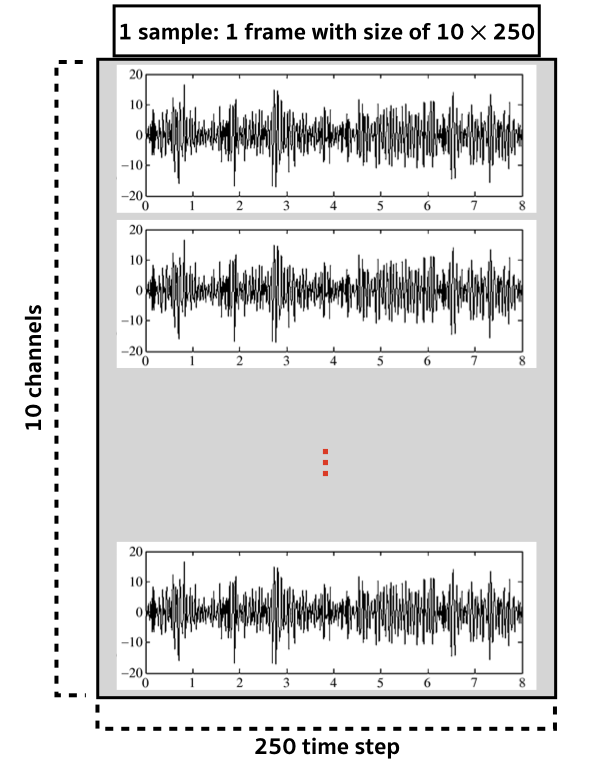

In [46]:
Image(folder_path+'All_picture/SSVEP_1frame.png', width=500)

In [0]:
# Reshape for classifier models
X_train_set = X_train_slid.reshape(-1, 1, X_train_slid.shape[2], X_train_slid.shape[3])
X_val_set = X_val_slid.reshape(-1, 1, X_val_slid.shape[2], X_val_slid.shape[3])
X_test_set = X_test_slid.reshape(-1, 1, X_test_slid.shape[2], X_test_slid.shape[3])

y_train_set = y_train_slid.reshape(-1)
y_val_set = y_val_slid.reshape(-1)
y_test_set = y_test_slid.reshape(-1)

In [0]:
import keras
from keras.models import Sequential, load_model
from keras.layers import Activation,Dense,Dropout, Reshape, Flatten, Conv2D, Add
from keras.layers import BatchNormalization, Input, SeparableConv2D, DepthwiseConv2D, AveragePooling2D, MaxPooling2D
from keras.callbacks import CSVLogger, ModelCheckpoint, ReduceLROnPlateau, TensorBoard
from keras.utils.np_utils import to_categorical 
from tensorflow.keras.constraints import max_norm
from keras.layers.advanced_activations import ELU
def DeepConvNet(nb_classes, Chans = 64, Samples = 256, dropoutRate = 0.5):
    """ Keras implementation of the Deep Convolutional Network as described in
    Schirrmeister et. al. (2017), Human Brain Mapping.
    
    This implementation assumes the input is a 2-second EEG signal sampled at 
    128Hz, as opposed to signals sampled at 250Hz as described in the original
    paper. We also perform temporal convolutions of length (1, 5) as opposed
    to (1, 10) due to this sampling rate difference. 
    
    Note that we use the max_norm constraint on all convolutional layers, as 
    well as the classification layer. We also change the defaults for the
    BatchNormalization layer. We used this based on a personal communication 
    with the original authors.
    
                      ours        original paper
    pool_size        1, 2        1, 3
    strides          1, 2        1, 3
    conv filters     1, 5        1, 10
    
    Note that this implementation has not been verified by the original 
    authors. 
    
    """

    # start the model
    model = Sequential()
    model.add(Conv2D(filters=25, kernel_size=(1, 5), input_shape=(1, Chans, Samples), kernel_constraint = max_norm(2., axis=(0,1,2))))
    
    model.add(Conv2D(filters=25, kernel_size= (Chans, 1), kernel_constraint = max_norm(2., axis =(0,1,2))))
    model.add(BatchNormalization(axis=1, epsilon=1e-05, momentum=0.1))
    model.add(Activation('elu')) 
    model.add(MaxPooling2D(pool_size=(1, 2), strides=(1, 2)))
    model.add(Dropout(dropoutRate))

    model.add(Conv2D(filters=50, kernel_size= (1, 5), kernel_constraint = max_norm(2., axis =(0,1,2))))
    model.add(BatchNormalization(axis=1, epsilon=1e-05, momentum=0.1))
    model.add(Activation('elu')) 
    model.add(MaxPooling2D(pool_size=(1, 2), strides=(1, 2)))
    model.add(Dropout(dropoutRate))

    model.add(Conv2D(filters=100, kernel_size= (1, 5), kernel_constraint = max_norm(2., axis =(0,1,2))))
    model.add(BatchNormalization(axis=1, epsilon=1e-05, momentum=0.1))
    model.add(Activation('elu')) 
    model.add(MaxPooling2D(pool_size=(1, 2), strides=(1, 2)))
    model.add(Dropout(dropoutRate))

    model.add(Conv2D(filters=200, kernel_size= (1, 5), kernel_constraint = max_norm(2., axis =(0,1,2))))
    model.add(BatchNormalization(axis=1, epsilon=1e-05, momentum=0.1))
    model.add(Activation('elu')) 
    model.add(MaxPooling2D(pool_size=(1, 2), strides=(1, 2)))
    model.add(Dropout(dropoutRate))

    model.add(Flatten())
    
    model.add(Dense(nb_classes, kernel_constraint = max_norm(0.5)))
    model.add(Activation('softmax'))
    print(model.summary())
    return model

def EEGNet_for_SSVEP(nb_classes = 12, Chans = 8, Samples = 256, 
                     dropoutRate = 0.5, kernLength = 256, F1 = 96, D = 1, F2 = 96,): # elu = ELU(alpha=1.0)
    """ SSVEP Variant of EEGNet, as used in [1]. 
    Inputs:
        
      nb_classes      : int, number of classes to classify
      Chans, Samples  : number of channels and time points in the EEG data
      dropoutRate     : dropout fraction
      kernLength      : length of temporal convolution in first layer
      F1, F2          : number of temporal filters (F1) and number of pointwise
                        filters (F2) to learn. 
      D               : number of spatial filters to learn within each temporal
                        convolution.
      dropoutType     : Either SpatialDropout2D or Dropout, passed as a string.
      
      
    [1]. Waytowich, N. et. al. (2018). Compact Convolutional Neural Networks
    for Classification of Asynchronous Steady-State Visual Evoked Potentials.
    Journal of Neural Engineering vol. 15(6). 
    http://iopscience.iop.org/article/10.1088/1741-2552/aae5d8
    """
    # start the model
    model = Sequential()
    model.add(Conv2D(filters=F1, kernel_size=(1, kernLength), padding='Same', 
                     input_shape=(1, Chans, Samples), use_bias = False))
    model.add(BatchNormalization())
    model.add(DepthwiseConv2D((Chans, 1), use_bias = False, depth_multiplier = D, depthwise_constraint = max_norm(1.)))
    model.add(BatchNormalization(axis=1))
    model.add(Activation('elu'))   
    model.add(AveragePooling2D((1, 4)))
    model.add(Dropout(dropoutRate))
    model.add(SeparableConv2D(F2, (1, 16), use_bias = False, padding = 'same'))          
    model.add(BatchNormalization(axis=1))        
    model.add(Activation('elu'))   
    model.add(AveragePooling2D((1, 8)))
    model.add(Dropout(dropoutRate))
    model.add(Flatten())
    model.add(Dense(nb_classes))
    model.add(Activation('softmax'))
    print(model.summary())
    return model

def ShallowConvNet(nb_classes, Chans = 64, Samples = 128, dropoutRate = 0.1):
    """ Keras implementation of the Shallow Convolutional Network as described
    in Schirrmeister et. al. (2017), Human Brain Mapping.
    
    Assumes the input is a 2-second EEG signal sampled at 128Hz. Note that in 
    the original paper, they do temporal convolutions of length 25 for EEG
    data sampled at 250Hz. We instead use length 13 since the sampling rate is 
    roughly half of the 250Hz which the paper used. The pool_size and stride
    in later layers is also approximately half of what is used in the paper.
    
    Note that we use the max_norm constraint on all convolutional layers, as 
    well as the classification layer. We also change the defaults for the
    BatchNormalization layer. We used this based on a personal communication 
    with the original authors.
    
                     ours        original paper
    pool_size        1, 35       1, 75
    strides          1, 7        1, 15
    conv filters     1, 13       1, 25    
    
    Note that this implementation has not been verified by the original 
    authors. We do note that this implementation reproduces the results in the
    original paper with minor deviations. 
    """
    # start the model
    model = Sequential()
    model.add(Conv2D(filters=128, kernel_size=(1, 25), input_shape=(1, Chans, Samples), kernel_constraint = max_norm(2., axis=(0,1,2))))
    model.add(Conv2D(filters=128, kernel_size= (Chans, 1), use_bias=False, kernel_constraint = max_norm(2., axis =(0,1,2))))
    model.add(BatchNormalization(axis=1, epsilon=1e-05, momentum=0.1))
    model.add(Activation('elu')) 
    model.add(AveragePooling2D(pool_size=(1, 75), strides=(1, 15)))
    model.add(Activation('elu'))
    model.add(Dropout(dropoutRate))
    model.add(Flatten())
    model.add(Dense(nb_classes, kernel_constraint = max_norm(0.5)))
    model.add(Activation('softmax'))
    print(model.summary())
    return model


In [0]:
def training(X_train,y_train,X_val,y_val,save_path):

    # model = EEGNet_for_SSVEP(nb_classes = 4, Chans = 10, Samples = 250, dropoutRate = 0.5, 
    #                          kernLength = 125, F1 = 96, D = 1, F2 = 96)
    # model = ShallowConvNet(nb_classes=4, Chans = 10, Samples = 250, dropoutRate = 0.5)
    model = DeepConvNet(nb_classes=4, Chans = 10, Samples = 250, dropoutRate = 0.5)
    print("Training...")
    adam = keras.optimizers.adam(lr=0.01, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
    model.compile(optimizer = adam, loss = "sparse_categorical_crossentropy", metrics=['sparse_categorical_accuracy'])
    reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=0.001)
    csv_logger = CSVLogger(save_path+"SSVEP_"+str(subject)+".log")
    filepath=save_path+"SSVEP"+str(subject)+"_weights-v-{epoch:02d}.hdf5"
    checkpointer = ModelCheckpoint(monitor='val_loss', filepath=filepath, verbose=1, save_best_only=True)
    model.fit(X_train, y_train, batch_size=64, epochs=50, validation_data=(X_val,y_val), verbose=1, callbacks=[checkpointer,csv_logger, reduce_lr])

    # open log file
    # log file contains loss of each epoch in each running step
    log_file = save_path+"SSVEP_"+str(subject)+".log"
    loss = []
    with open(log_file) as f:
        f = f.readlines()
    f[0:] = f[1:] #delete header
    for line in f:
        loss.append([int(line.split(',')[0]), float(line.split(',')[3])]) #save all lost to list

    # find minimum loss
    # Keep minimum lost and save its index and use it for testing  
    min_loss = 100
    for data in range(len(loss)):
        if loss[data][1] < min_loss:
            min_loss = loss[data][1]
            best_model_index = loss[data][0]
    return best_model_index,loss[:][1]

In [0]:
def testing(X_te, Y_te, w_path):
    model = load_model(w_path)
    adam = keras.optimizers.adam(lr=0.01, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
    model.compile(loss='sparse_categorical_crossentropy', optimizer = adam, metrics=['sparse_categorical_accuracy'])
    loss, accuracy = model.evaluate(X_te, Y_te, batch_size=64, verbose=1)
    print('Test loss:', loss)
    print('Test accuracy:', accuracy)  
    return loss, accuracy, model

In [51]:
print('Start training')
print("---------------------------------------------")
save_path = folder_path+'weights/'
 #training
best_model_index, temp_loss = training(X_train_set, y_train_set, X_val_set, y_val_set, save_path)
print("best_model_index", best_model_index)

Start training
---------------------------------------------


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 25, 10, 246)       150       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 25, 1, 246)        6275      
_________________________________________________________________
batch_normalization_1 (Batch (None, 25, 1, 246)        100       
_________________________________________________________________
activation_7 (Activation)    (None, 25, 1, 246)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 25, 1, 123)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 25, 1, 123)        0         
_________________________________________________________

In [52]:
#testing
save_test = save_path+"SSVEP"+str(subject)+"_weights-v"+'-'+str(int(best_model_index)+1).zfill(2)+'.hdf5'
loss, accuracy, model_ = testing(X_test_set, y_test_set , save_test)

700/700 [==============================] - 1s 2ms/step
Test loss: 0.17385547961507525
Test accuracy: 0.9342857146263123


### **TODO2:** จาก 3 DL ที่กำหนดให้ข้างต้น จงระบุ DL ที่เหมาะสำหรับการแยกความถี่ของสัญญาณ SSVEP มากที่สุด ?

In [0]:
# CCA constant
PI = np.pi
sampling_frequency = 250
candidate_frequency = [5.45, 6.67, 8.57, 12]
reference_signal_phase = 0

In [0]:
# Generate Reference Frequency
sin = lambda f, h, t, p: np.sin(2*PI*f*h*t + p)
cos = lambda f, h, t, p: np.cos(2*PI*f*h*t + p)
ref_wave = lambda f, h, t, p: [sin(f, h, t, p), cos(f, h, t, p)]

def generate_reference_signal_at_time(f, t, max_harmonic, phase):
    values = []
    for h in range(1, max_harmonic + 1):
        values += ref_wave(f, h, t, phase)
    return values

def generate_reference_signal(frequency, sampling_frequency, total_time, max_harmonic, phase):
    ref_signal = []
    num_time_step = total_time * sampling_frequency
    for step in range(num_time_step):
        time = step * 1/sampling_frequency
        ref_signal_at_t = generate_reference_signal_at_time(frequency, time, max_harmonic, phase)
        ref_signal.append(ref_signal_at_t)
    return ref_signal

In [0]:
# Solve for Maximum CCA from two multidimensional signal
def find_maximum_canonical_correlations(X, Y):
    if X.shape[0] == Y.shape[0]:
        N = X.shape[0]
    else:
        print('time frame is not equal')
        return None
    C_xx = 1/N * (X.T @ X)
    C_yy = 1/N * (Y.T @ Y)
    C_xy = 1/N * (X.T @ Y)
    C_yx = 1/N * (Y.T @ X)
    C_xx_inv = np.linalg.pinv(C_xx)
    C_yy_inv = np.linalg.pinv(C_yy)
    eig_values, eig_vectors = scipy.linalg.eig(C_yy_inv @ C_yx @ C_xx_inv @ C_xy)
    sqrt_eig_values = np.sqrt(eig_values)
    return max(sqrt_eig_values)

In [0]:
def classify_cca(input_data, ref_signal, actual_freq):
    input_signal = pd.DataFrame(input_data)
    max_cca = {}
    for ref_signal_key in ref_signal.keys():
        value = find_maximum_canonical_correlations(input_signal, ref_signal[ref_signal_key])
        if value.imag == 0.0:
            value = value.real
        else:
            value = None
        max_cca[ref_signal_key] = value
    max_cca["result"] = max(max_cca.items(), key = lambda x: x[1])[0]
    max_cca["actual_freq"] = actual_freq
    return max_cca

In [0]:
# Generate Reference Data
ref_signal = {}
for frequency in candidate_frequency:
    signal = generate_reference_signal(
            frequency=frequency,
            sampling_frequency=250,
            total_time=1,
            max_harmonic=6,
            phase=reference_signal_phase
    )
    ref_signal[frequency] = pd.DataFrame(signal)

In [0]:
# เปลี่ยนค่า label ที่อยู่ในรูป 0-3 ให้อยู่ในรูปแบบค่าความถี่
def convert_class_to_freq(data):
    new_label = []
    for val_class in data:
        if val_class == 0:
            new_label.append(12)
        elif val_class == 1:
            new_label.append(8.57)
        elif val_class == 2:
            new_label.append(6.67)
        else:
            new_label.append(5.45)
    return np.array(new_label)

In [59]:
# เตรียมข้อมูลสำหรับการใช้ CCA อีกครั้ง
X_test_sw = np.swapaxes(X_test_slid.reshape(-1, X_test_slid.shape[2], X_test_slid.shape[3]), 1, 2)
y_test_freq = convert_class_to_freq(y_test_slid.reshape(-1))
print("Validate the dimension of data and its labeling")
print("\n")
print(X_test_sw.shape)
print(y_test_freq.shape)

Validate the dimension of data and its labeling


(700, 250, 10)
(700,)


In [60]:
result = {}
result['testing'] = []
for window_index in range(X_test_sw.shape[0]):

    result['testing'].append(
        classify_cca(X_test_sw[window_index,:,:], ref_signal, y_test_freq[window_index])
    )
testing_result = pd.DataFrame(result['testing'])
sum_correct = np.sum(testing_result['result'] == testing_result["actual_freq"])
acc_tr = sum_correct / len(testing_result['result'].values)
print("Correct frequencies: {} from total: {}".format(sum_correct, len(testing_result['result'])))
print("The accuracy is:", acc_tr)

Correct frequencies: 520 from total: 700
The accuracy is: 0.7428571428571429


### ถ้าต้องการใช้ 3D Convolution Neural Network จะต้องทำการเตรียมสัญญาณ SSVEP อย่างไร และความถูกต้องในการแยกความถี่สัญญาณ SSVEP ของ proposed model จะดีกว่า state of the art model หรือไม่ ?


X. Zhao, H. Zhang, G. Zhu, F. You, S. Kuang and L. Sun, "A Multi-Branch 3D Convolutional Neural Network for EEG-Based Motor Imagery Classification," in IEEE Transactions on Neural Systems and Rehabilitation Engineering, vol. 27, no. 10, pp. 2164-2177, Oct. 2019. [link text](https://ieeexplore.ieee.org/document/8820089)

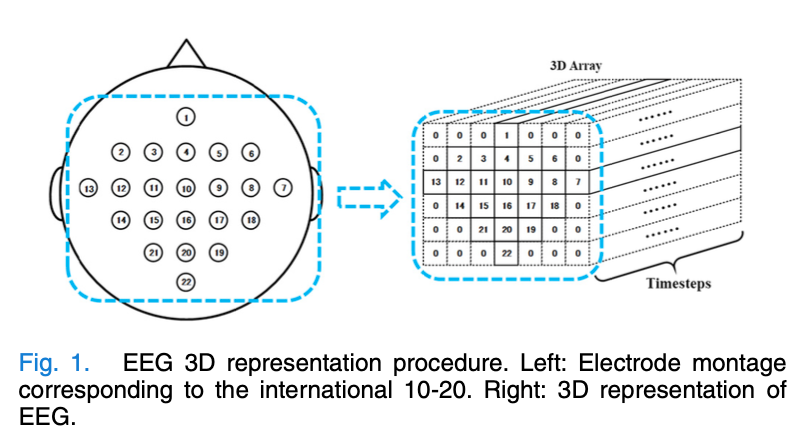

In [0]:
Image(folder_path+'All_picture/all_ch_3d.png', width=500)

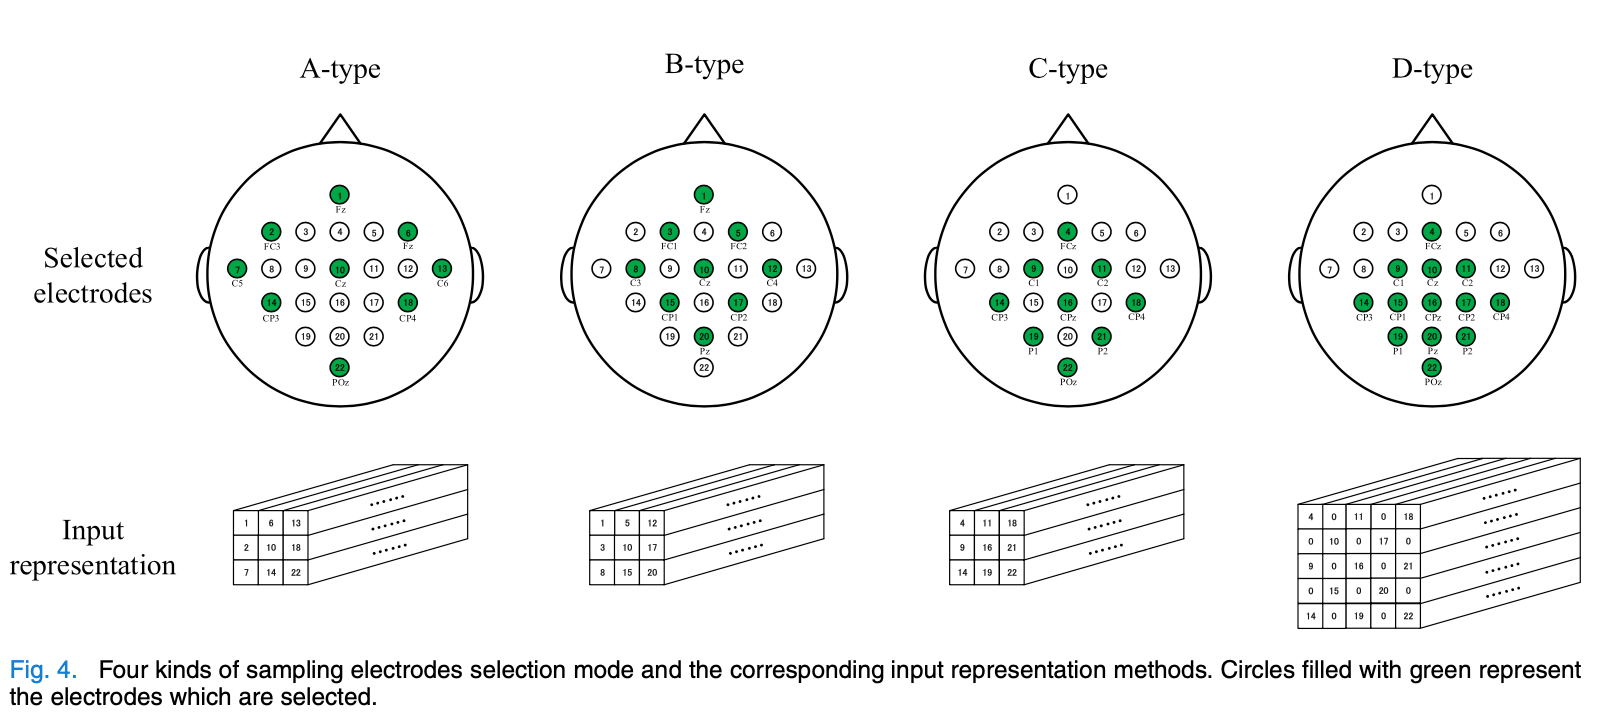

In [0]:
Image(folder_path+'All_picture/some_ch_3d.png', width=600)

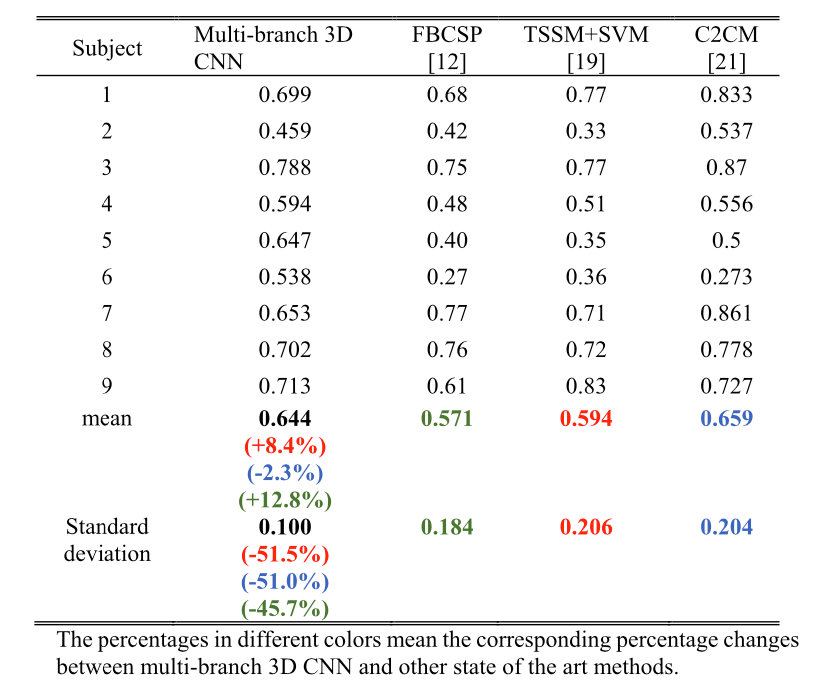

In [0]:
Image(folder_path+'All_picture/Crucial_result.png', width=600)

## การเตรียมสัญญาณ SSVEP ในรูปแบบ 3D (3D-EEG) สำหรับนำไปใช้ในการ train 3D-CNN model

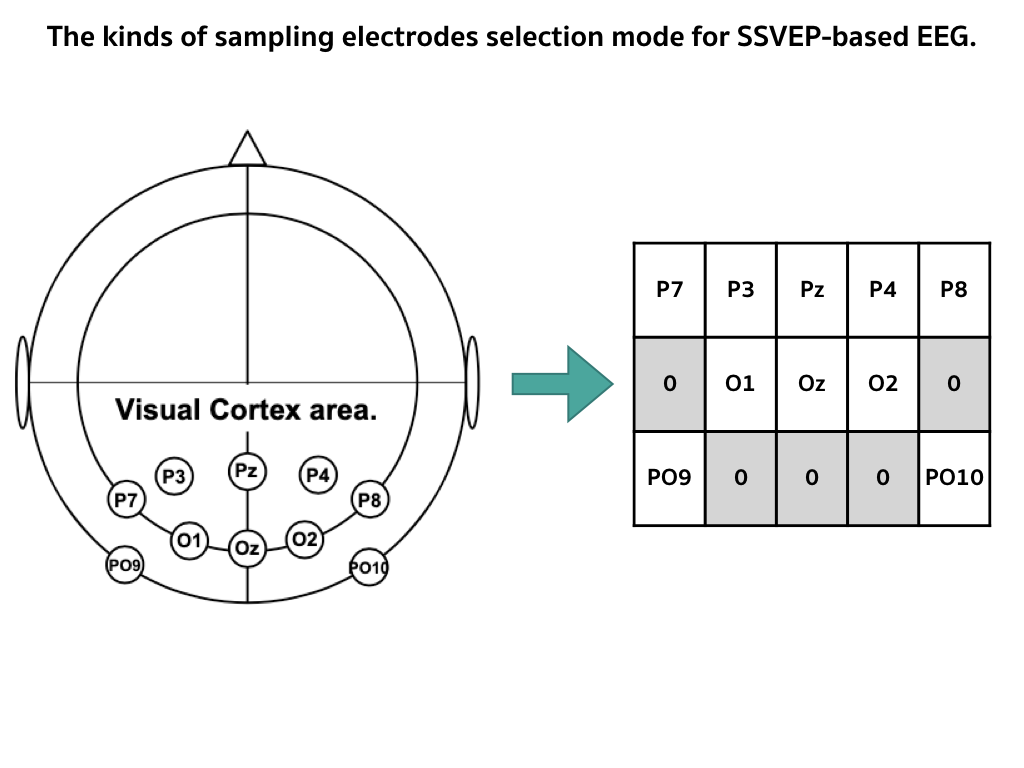

In [61]:
Image(folder_path+'All_picture/3D_EEG_forSSVEP.png', width=600)

In [0]:
# TODO#3: ให้สร้างฟังก์ชันในการแปลง 2D EEG (สัญญาณ SSVEP ที่มีขนาดภาพ (10*250)) ให้เป็น 3D EEG (สัญญาณ SSVEP ที่มีขนาดวิดิโอ (3*5*250))
#################################################################################
# indexing for each channel == ['P7', 'P3', 'Pz', 'P4', 'P8', 'PO9', 'PO10', 'O1', 'Oz', 'O2' ]
def eeg_3D(data, row=3, col=5):



#################################################################################
#                               END OF TODO#3                                   #
#################################################################################

In [0]:
# ทำการสร้าง 3D-EEG โดยการใช้ฟังก์ที่สร้างขึ้น
X_train_3D = eeg_3D(X_train_set)
X_val_3D = eeg_3D(X_val_set)
X_test_3D = eeg_3D(X_test_set)

eeg_3D (1400, 1, 3, 5, 250)
eeg_3D (700, 1, 3, 5, 250)
eeg_3D (700, 1, 3, 5, 250)


In [0]:
from keras.layers import Conv3D
from keras.models import Model
def SRF(x):
    # 1st layer
    srf = Conv3D(filters=32, kernel_size=(2,2,1), strides=(2,2,1), padding='Same')(x)
    srf = BatchNormalization()(srf)
    srf = ELU(alpha=1.0)(srf)
    srf = Dropout(do_rate)(srf)
    
    # 2nd layer
    srf = Conv3D(filters=64, kernel_size=(2,2,1), strides=(2,2,1), padding='Same')(srf)
    srf = BatchNormalization()(srf)
    srf = ELU(alpha=1.0)(srf)
    srf = Dropout(do_rate)(srf)
    
    srf = Flatten()(srf)
    
    srf = Dense(32)(srf)
    srf = BatchNormalization()(srf)
    srf = Activation('relu')(srf)
    srf = Dropout(do_rate)(srf)

    srf = Dense(32)(srf)
    srf = BatchNormalization()(srf)
    srf = Activation('relu')(srf)
    srf = Dropout(do_rate)(srf)

    srf = Dense(num_classes)(srf)
    srf = Activation('softmax')(srf)
    
    return srf

def MRF(x):
    # 1st layer
    mrf = Conv3D(filters=32, kernel_size=(2,2,3), strides=(2,2,2), padding='Same')(x)
    mrf = BatchNormalization()(mrf)
    mrf = ELU(alpha=1.0)(mrf)
    mrf = Dropout(do_rate)(mrf)
    
    # 2nd layer
    mrf = Conv3D(filters=64, kernel_size=(2,2,3), strides=(2,2,2), padding='Same')(mrf)
    mrf = BatchNormalization()(mrf)
    mrf = ELU(alpha=1.0)(mrf)
    mrf = Dropout(do_rate)(mrf)
    
    mrf = Flatten()(mrf)
    
    mrf = Dense(32)(mrf)
    mrf = BatchNormalization()(mrf)
    mrf = Activation('relu')(mrf)
    mrf = Dropout(do_rate)(mrf)

    mrf = Dense(32)(mrf)
    mrf = BatchNormalization()(mrf)
    mrf = Activation('relu')(mrf)
    mrf = Dropout(do_rate)(mrf)

    mrf = Dense(num_classes)(mrf)
    mrf = Activation('softmax')(mrf)
    
    return mrf

def LRF(x):
    # 1st layer
    lrf = Conv3D(filters=32, kernel_size=(2,2,5), strides=(2,2,4), padding='Same')(x)
    lrf = BatchNormalization()(lrf)
    lrf = ELU(alpha=1.0)(lrf)
    lrf = Dropout(do_rate)(lrf)
    
    # 1st layer
    lrf = Conv3D(filters=64, kernel_size=(2,2,5), strides=(2,2,4), padding='Same')(lrf)
    lrf = BatchNormalization()(lrf)
    lrf = ELU(alpha=1.0)(lrf)
    lrf = Dropout(do_rate)(lrf)
    
    lrf = Flatten()(lrf)
    
    lrf = Dense(32)(lrf)
    lrf = BatchNormalization()(lrf)
    lrf = Activation('relu')(lrf)
    lrf = Dropout(do_rate)(lrf)

    lrf = Dense(32)(lrf)
    lrf = BatchNormalization()(lrf)
    lrf = Activation('relu')(lrf)
    lrf = Dropout(do_rate)(lrf)

    lrf = Dense(num_classes)(lrf)
    lrf = Activation('softmax')(lrf)
    
    return lrf


def model_multi_branch(input_dim):
    x = Input(shape=input_dim)

    shared = Conv3D(filters=16, kernel_size=(2,2,5), strides=(1,1,4), padding='Same')(x)
    shared = BatchNormalization()(shared)
    shared = ELU(alpha=1.0)(shared)
    shared = Dropout(do_rate)(shared)

    model_SRF = SRF(shared)
    model_MRF = MRF(shared)
    model_LRF = LRF(shared)

    added = Add()([model_SRF, model_MRF, model_LRF])
    out = Activation('softmax')(added)
    model = Model(inputs=x, outputs=out)
    print(model.summary()) # Show summary of model
    return model

In [0]:
def training_3DCNN(X_train,y_train,X_val,y_val,save_path):

    model = model_multi_branch((1,3,5,250))
    print("Training...")
    adam = keras.optimizers.adam(lr=0.01, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
    model.compile(optimizer = adam, loss = "sparse_categorical_crossentropy", metrics=['sparse_categorical_accuracy'])
    reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=0.001)
    csv_logger = CSVLogger(save_path+"SSVEP_"+str(subject)+".log")
    filepath=save_path+"SSVEP"+str(subject)+"_weights-v-{epoch:02d}.hdf5"
    checkpointer = ModelCheckpoint(monitor='val_loss', filepath=filepath, verbose=1, save_best_only=True)
    model.fit(X_train, y_train, batch_size=64, epochs=100, validation_data=(X_val,y_val), verbose=1, callbacks=[checkpointer,csv_logger, reduce_lr])

    # open log file
    # log file contains loss of each epoch in each running step
    log_file = save_path+"SSVEP_"+str(subject)+".log"
    loss = []
    with open(log_file) as f:
        f = f.readlines()
    f[0:] = f[1:] #delete header
    for line in f:
        loss.append([int(line.split(',')[0]), float(line.split(',')[3])]) #save all lost to list

    # find minimum loss
    # Keep minimum lost and save its index and use it for testing  
    min_loss = 100
    for data in range(len(loss)):
        if loss[data][1] < min_loss:
            min_loss = loss[data][1]
            best_model_index = loss[data][0]
    return best_model_index,loss[:][1]

In [0]:
def testing_3DCNN(X_te, Y_te, w_path):
    model = load_model(w_path)
    adam = keras.optimizers.adam(lr=0.01, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
    model.compile(loss='sparse_categorical_crossentropy', optimizer = adam, metrics=['sparse_categorical_accuracy'])
    loss, accuracy = model.evaluate(X_te, Y_te, batch_size=64, verbose=1)
    print('Test loss:', loss)
    print('Test accuracy:', accuracy)  
    return loss, accuracy, model

In [0]:
print('Start training')
print("---------------------------------------------")
save_path_new = folder_path+'3DCNN_weights/'
do_rate = 0.3
num_classes = 4
 #training
best_model_index, temp_loss = training_3DCNN(X_train_3D, y_train_set, X_val_3D, y_val_set, save_path_new)
print("best_model_index", best_model_index)

Start training
---------------------------------------------
Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 1, 3, 5, 250) 0                                            
__________________________________________________________________________________________________
conv3d_1 (Conv3D)               (None, 16, 3, 5, 63) 336         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_2 (BatchNor (None, 16, 3, 5, 63) 252         conv3d_1[0][0]                   
__________________________________________________________________________________________________
elu_1 (ELU)                     (None, 16, 3, 5, 63) 0           batch_normalization_2[0][0]      
_______________________________

In [0]:
#testing
save_test = save_path_new+"SSVEP"+str(subject)+"_weights-v"+'-'+str(int(best_model_index)+1).zfill(2)+'.hdf5'
loss, accuracy, model_ = testing_3DCNN(X_test_3D, y_test_set , save_test)

700/700 [==============================] - 3s 4ms/step
Test loss: 0.28468522923333306
Test accuracy: 0.9471428574834551
